# Proyek Predictive Analytics: Titanic Dataset
- **Link Dataset**: https://www.kaggle.com/datasets/yasserh/titanic-dataset
- **Nama:** Roikhatul Janah
- **Email:** roikhatuljanah0302@gmail.com
- **ID Dicoding:** roikhatul

## Pertanyaan Bisnis
- Bagaimana model ini dapat digunakan untuk prediksi Keselamatan Penumpang berdasarkan data yang ada?
- 3 fitur apa yang paling berpengaruh dalam memprediksi Keselamatan Penumpang Titanic?

## Import Library

In [1]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import streamlit as st
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import joblib
import os
import warnings
warnings.filterwarnings("ignore")


## Data Preparation

### Data Loading

In [2]:
# Pengaturan tampilan
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="whitegrid")

# Load data
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


#### **Insight :**
Dataset ini mencakup informasi:
- Pclass    : Kelas tiket penumpang (1, 2, atau 3)
- Sex   : Jenis kelamin penumpang (male atau female)
- Age   : Usia penumpang
- SibSp : Jumlah saudara atau pasangan yang ikut dalam perjalanan
- Parch : Jumlah orang tua atau anak yang ikut dalam perjalanan
- Fare  : Tarif yang dibayar oleh penumpang
- Embarked  : Pelabuhan tempat penumpang naik (C = Cherbourg; Q = Queenstown; S = Southampton)
- Survived  : Status keselamatan penumpang (0 = Tidak Selamat, 1 = Selamat)

### Exploratory Data Analysis (EDA)

In [3]:
# Cek informasi umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Statistik deskriptif
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [5]:
# Cek missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Identifikasi Kolom Numerik dan Kategorikal
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nKolom Numerik: {num_cols}")
print(f"Kolom Kategorikal: {cat_cols}")


Kolom Numerik: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Kolom Kategorikal: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


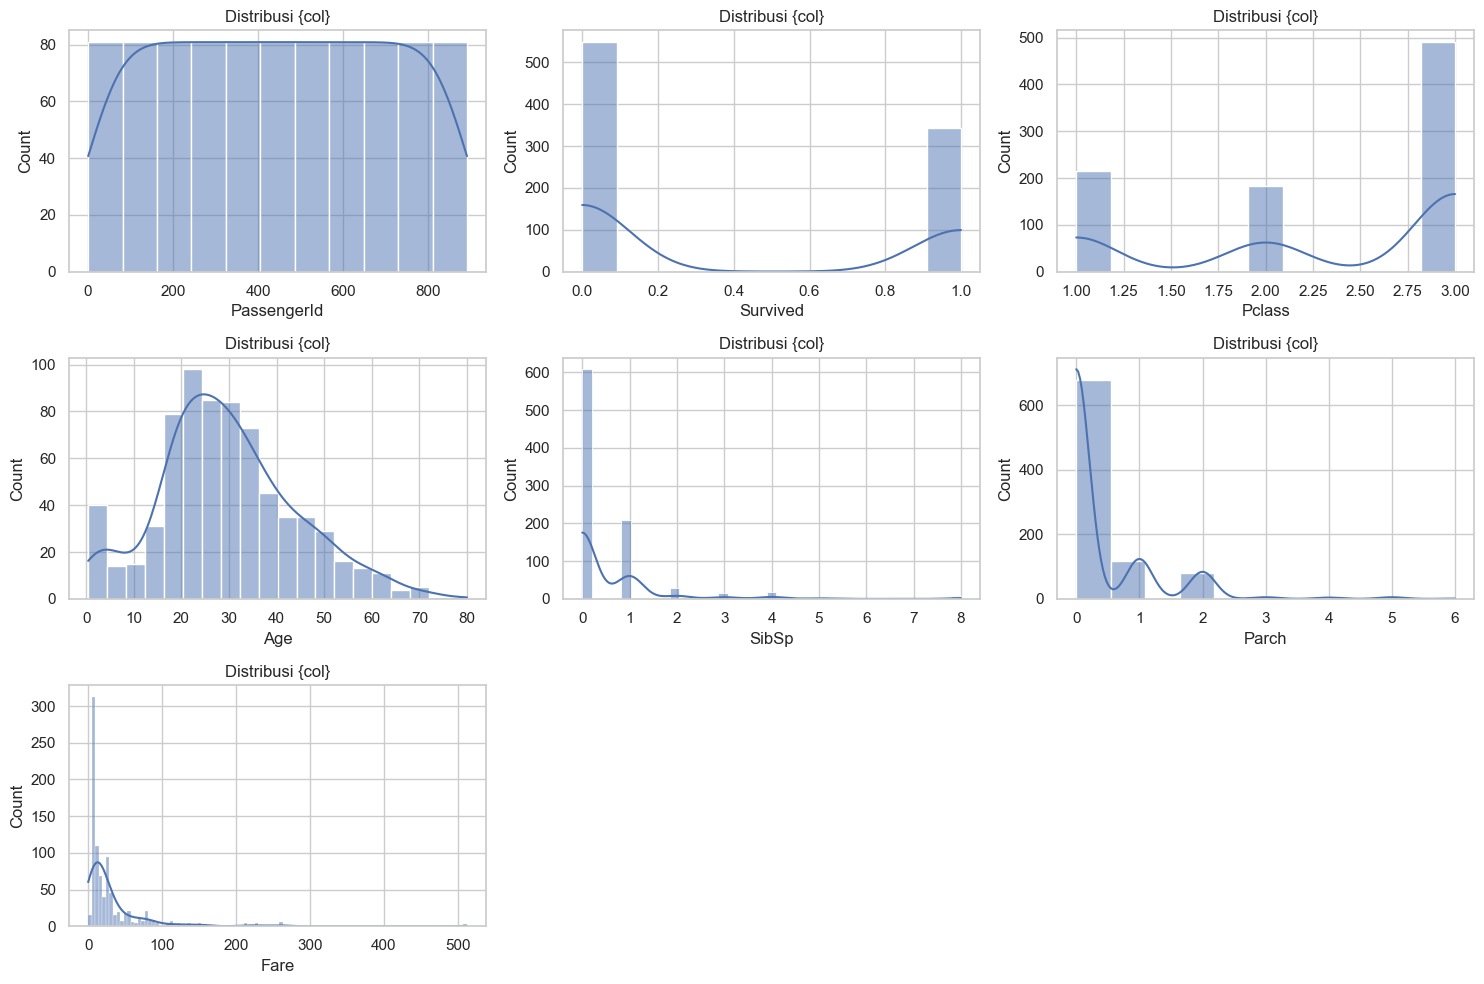

In [7]:
# Visualisasi Distribusi Data Numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:min(len(num_cols), 9)]):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title('Distribusi {col}')
plt.tight_layout()
plt.show()

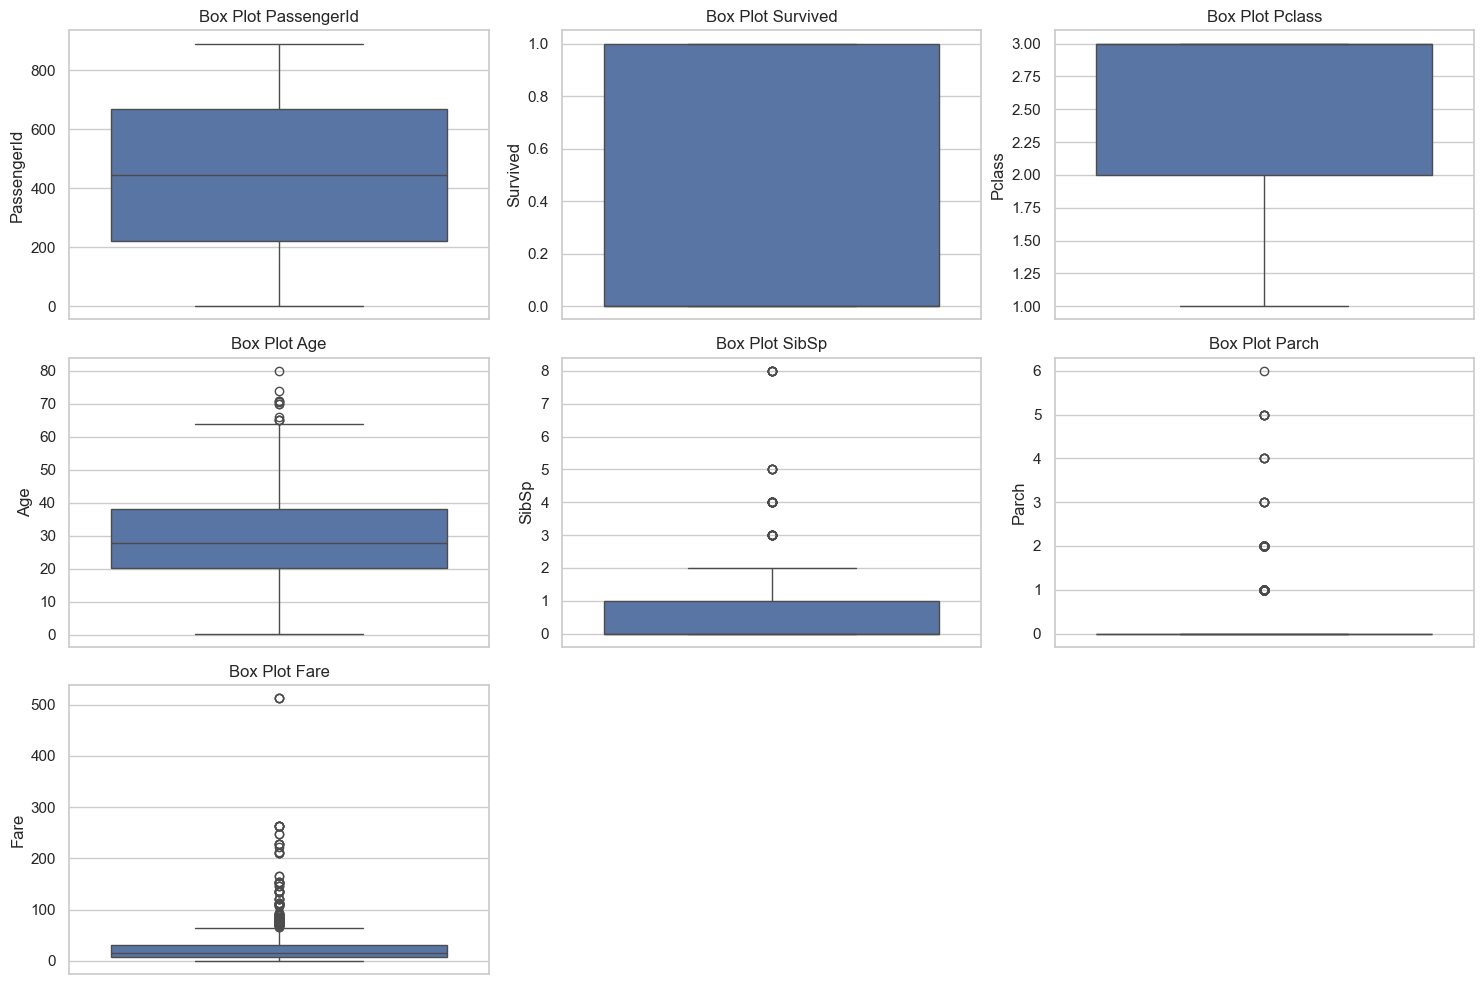

In [8]:
# Deteksi Outlier dengan Box Plot
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:min(len(num_cols), 9)]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot {col}')
plt.tight_layout()
plt.show()

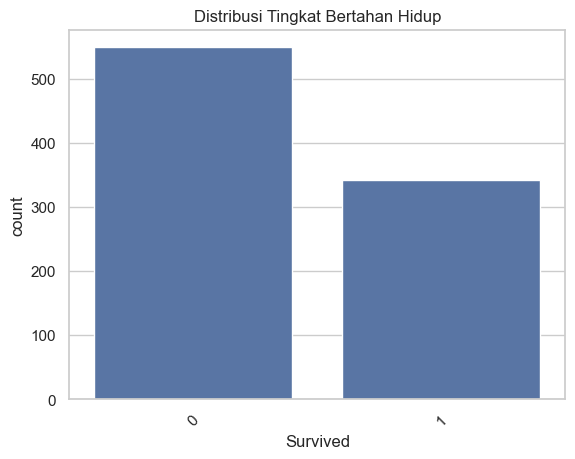

In [9]:
# Distribusi Item Type
sns.countplot(data=df, x='Survived')
plt.title("Distribusi Tingkat Bertahan Hidup")
plt.xticks(rotation=45)
plt.show()

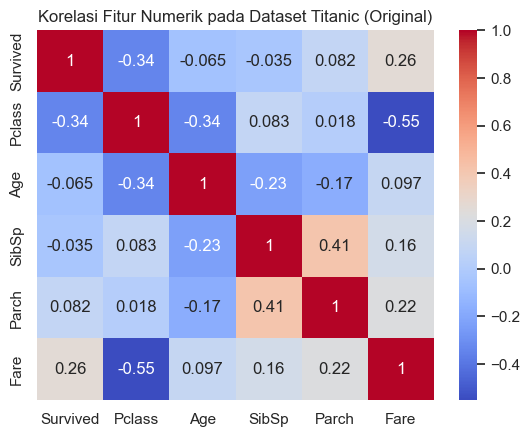

In [10]:
# Korelasi antar fitur numerik
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Karena 'Age' ada missing value, isi dulu biar nggak error saat .corr()
df['Age'] = df['Age'].fillna(df['Age'].median())

# Plot heatmap korelasi
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Numerik pada Dataset Titanic (Original)")
plt.show()

#### **Insight :**
- **Data Umum** : Jumlah data: 891 baris, 12 kolom.Missing values ditemukan pada kolom Age (177 data hilang), Cabin (687 data hilang), dan Embarked (2 data hilang).
- **Statistik** : Kolom Age memiliki missing values yang cukup banyak, perlu penanganan lebih lanjut.Kolom Fare menunjukkan variasi yang besar, dengan tarif yang bisa sangat tinggi.Pclass dan Survived adalah kolom dengan data kategori yang sepenuhnya terisi.
- **Distribusi Kategori** : Sex: Lebih banyak penumpang pria (male) dibandingkan wanita (female). Embarked: Mayoritas penumpang berangkat dari pelabuhan Southampton (S), diikuti Cherbourg (C) dan Queenstown (Q). Cabin: Kolom Cabin memiliki banyak missing values, sehingga mungkin tidak cukup informatif tanpa penanganan lebih lanjut.
- **Korelasi** : Kolom SibSp dan Parch memiliki korelasi positif rendah, yang menunjukkan bahwa penumpang yang memiliki saudara atau pasangan di kapal mungkin juga membawa orang tua atau anak.
Age dan Fare tidak memiliki korelasi yang sangat kuat, yang menunjukkan bahwa usia penumpang tidak terlalu berpengaruh terhadap tarif yang dibayar.

### Data Preprocessing

In [11]:
data = df.copy()

In [12]:
# Menghapus kolom
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [13]:
# Isi missing value
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

print("\nJumlah missing values Akhir")
print(data.isnull().sum())


Jumlah missing values Akhir
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64



Jumlah outlier pada Age: 66


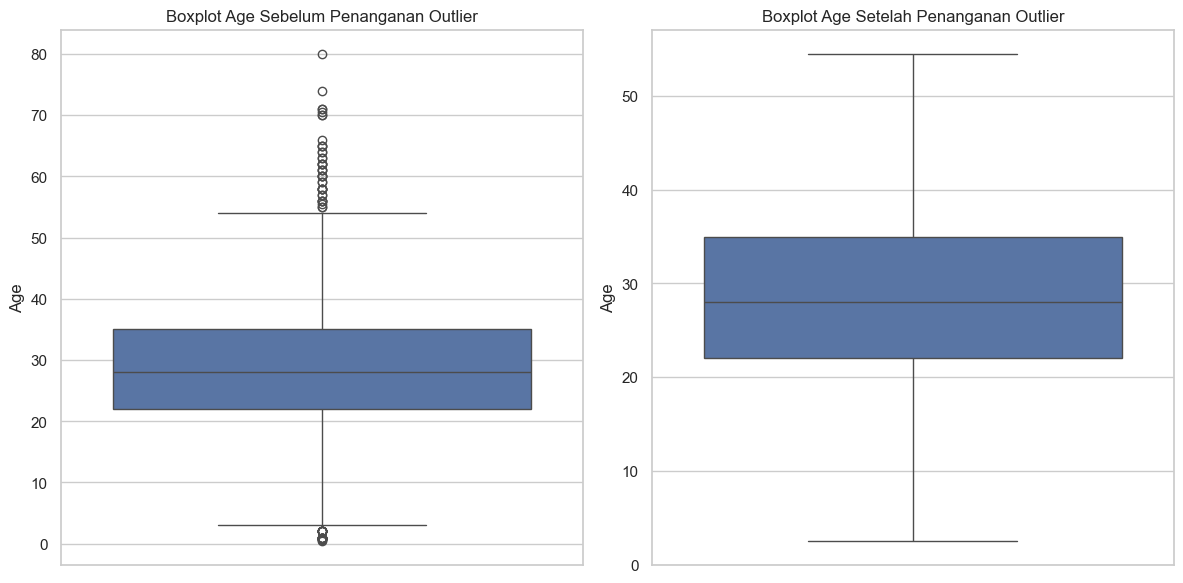


Jumlah outlier pada SibSp: 46


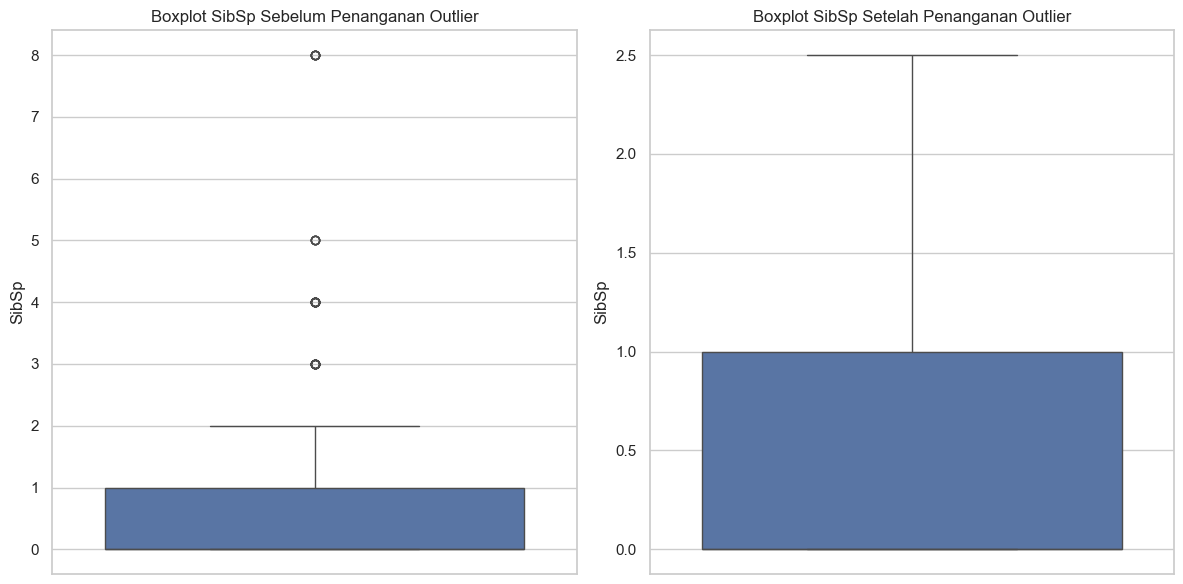


Jumlah outlier pada Parch: 213


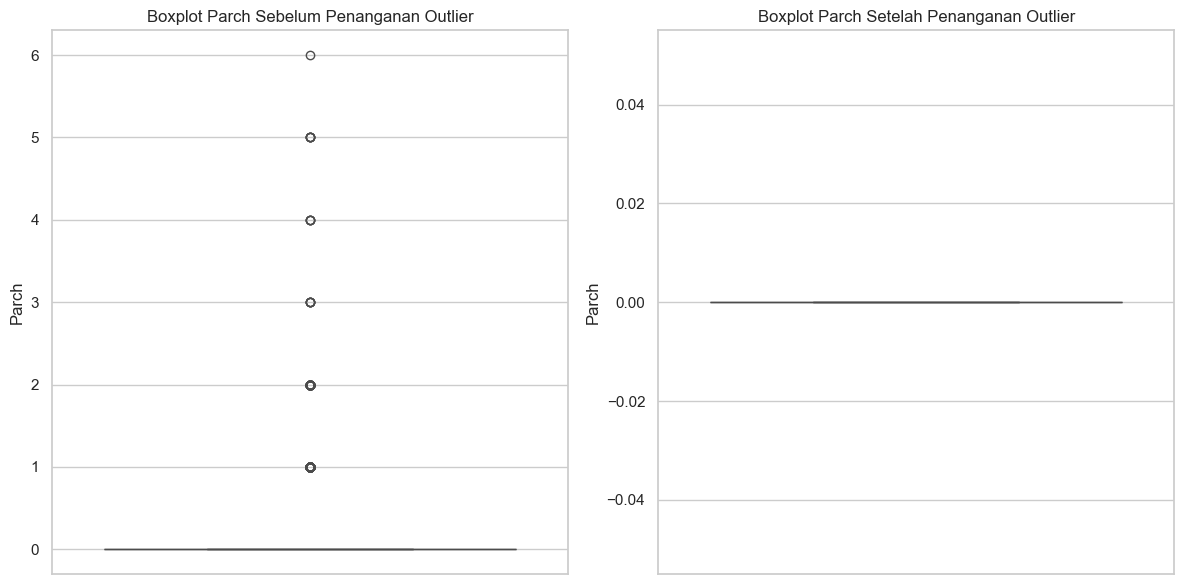


Jumlah outlier pada Fare: 116


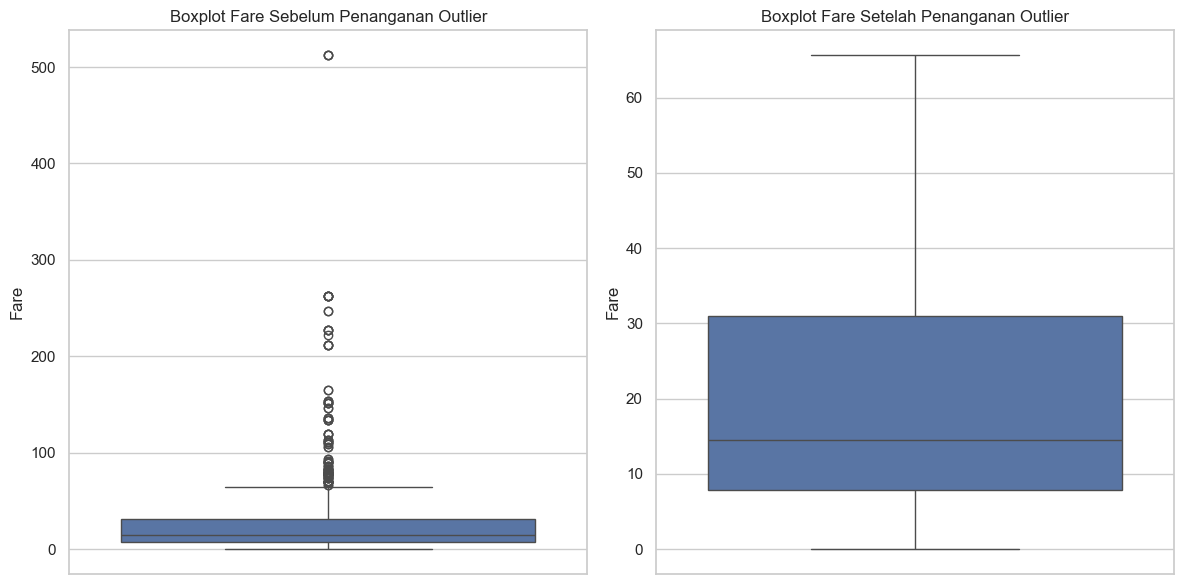

In [14]:
# 3. Deteksi dan Penanganan Outlier menggunakan IQR
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Plot distribusi sebelum penanganan outlier
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot {column} Sebelum Penanganan Outlier')
    
    # Identifikasi outlier
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"\nJumlah outlier pada {column}: {len(outliers)}")
    
    # Capping outlier dengan batas atas dan bawah
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    
    
    # Plot distribusi setelah penanganan outlier
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot {column} Setelah Penanganan Outlier')
    plt.tight_layout()
    plt.show()
    
    return data

# Tangani outlier pada kolom 'Age, SibSp, Parch, Fare'
for col in ['Age', 'SibSp', 'Parch', 'Fare']:
    data = handle_outliers(data, col)

In [15]:
# 4. Encoding Data Kategorikal
label_encoders = {}
categorical_columns = ['Sex', 'Embarked']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

    mapping = {index: label for index, label in enumerate(le.classes_)}
    print(f"\nMapping untuk {col}:")
    print(mapping)


Mapping untuk Sex:
{0: 'female', 1: 'male'}

Mapping untuk Embarked:
{0: 'C', 1: 'Q', 2: 'S'}


In [16]:
# 4. Seleksi fitur untuk modeling
features = ['Pclass','Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

X = data[features]
y = data[target]

In [17]:
# 5. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Output Standarisasi
print("\nStandarisasi Data (X_scaled):")
print(pd.DataFrame(X_scaled, columns=features).head())


Standarisasi Data (X_scaled):
   Pclass   Sex   Age  SibSp  Parch  Fare  Embarked
0    0.83  0.74 -0.58   0.81   0.00 -0.82      0.59
1   -1.57 -1.36  0.74   0.81   0.00  2.03     -1.94
2    0.83 -1.36 -0.25  -0.60   0.00 -0.79      0.59
3   -1.57 -1.36  0.49   0.81   0.00  1.42      0.59
4    0.83  0.74  0.49  -0.60   0.00 -0.78      0.59


In [18]:
# 6. Pembagian data tetap dilakukan setelah deteksi outlier dan PCA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output Pembagian Dataset
print("\nJumlah data setelah pembagian train/test:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


Jumlah data setelah pembagian train/test:
X_train: (712, 7), X_test: (179, 7)


In [19]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#### **Insight :**
1. **Hapus Missing Value**: Kolom dengan missing values (seperti Age dan Embarked) telah diisi dengan metode yang sesuai. Age diisi dengan median, dan Embarked dengan mode, meningkatkan kualitas dan kelengkapan data.
Setelah pengisian missing values, tidak ada lagi data yang hilang dalam dataset.
2. **Deteksi dan Penanganan Outlier:**
Outlier pada kolom Age, SibSp, Parch, dan Fare telah ditangani menggunakan teknik IQR (Interquartile Range). Outlier di-capping ke nilai batas atas dan bawah, mengurangi pengaruh nilai ekstrem yang dapat mempengaruhi hasil model.Visualisasi menggunakan boxplot sebelum dan setelah penanganan memberikan gambaran yang jelas tentang distribusi data.
3. **Encode Kategori**: Kolom Sex dan Embarked yang bersifat kategorikal telah di-encode menjadi format numerik menggunakan LabelEncoder.Proses ini membuat data siap diproses oleh model machine learning dan mempermudah interpretasi model.
4. **Seleksi Fitur**: Fitur yang relevan untuk prediksi keselamatan penumpang Titanic (kolom seperti Pclass, Sex, Age, SibSp, Parch, Fare, Embarked) telah dipilih, sementara kolom yang tidak penting telah dihapus, mengurangi noise pada model.
Pemilihan fitur ini memastikan bahwa model hanya memproses informasi yang relevan.
5. **Standarisasi**: Fitur numerik yang dipilih telah distandarisasi menggunakan StandardScaler. Dengan ini, semua fitur berada pada skala yang sama, yang penting untuk banyak algoritma machine learning seperti KNN, SVM, dan regresi logistik.Standarisasi membantu model untuk belajar lebih efisien dan memberikan hasil yang lebih baik.
6. **Train-Test Split**: Dataset dibagi menjadi data training dan testing menggunakan train_test_split. Proporsi data training dan testing adalah 80% dan 20% untuk memastikan model dievaluasi dengan data yang tidak terlihat sebelumnya.
7. **Penanganan Ketidakseimbangan Kelas dengan SMOTE:**
Untuk menangani ketidakseimbangan kelas dalam variabel target Survived, SMOTE (Synthetic Minority Over-sampling Technique) digunakan untuk melakukan resampling pada data training, meningkatkan jumlah data dari kelas minoritas (misalnya penumpang yang selamat).

## Modelling

In [20]:
# Modeling
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42, class_weight='balanced'),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    "XGBoost Classifier": XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R2": r2,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }


## Evaluasi dan Visualisasi

In [21]:
# Evaluasi
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Metrics:")
print(results_df.sort_values(by="Accuracy", ascending=False))


Model Evaluation Metrics:
                              MAE  MSE   R2  Accuracy  Precision  Recall  \
Random Forest Classifier     0.16 0.16 0.33      0.84       0.82    0.78   
XGBoost Classifier           0.18 0.18 0.24      0.82       0.77    0.80   
Logistic Regression          0.19 0.19 0.22      0.81       0.73    0.85   
Gradient Boosting Classifier 0.24 0.24 0.01      0.76       0.70    0.74   

                              F1-Score  
Random Forest Classifier          0.80  
XGBoost Classifier                0.78  
Logistic Regression               0.79  
Gradient Boosting Classifier      0.72  


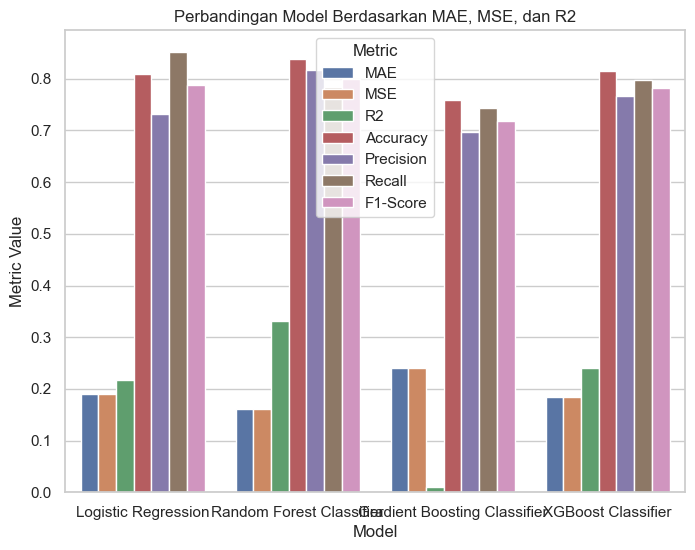

In [22]:
# Visualisasi Hasil
plt.figure(figsize=(8,6))
sns.barplot(data=results_df.reset_index().melt(id_vars='index'), x='index', y='value', hue='variable')
plt.title("Perbandingan Model Berdasarkan MAE, MSE, dan R2")
plt.xlabel("Model")
plt.ylabel("Metric Value")
plt.legend(title="Metric")
plt.show()

In [23]:
# Simpan model yang sudah dilatih (tanpa melatih ulang)
for name, model in models.items():
    joblib.dump(model, f'model/{name.lower().replace(" ", "_")}.pkl')
    print(f"Model {name} disimpan sebagai: model/{name.lower().replace(' ', '_')}.pkl")

# Simpan model terbaik (Random Forest Classifier)
joblib.dump(models["Random Forest Classifier"], 'model/best_model.pkl')
print("Model terbaik (Random Forest Classifier) disimpan sebagai: model/best_model.pkl")

Model Logistic Regression disimpan sebagai: model/logistic_regression.pkl
Model Random Forest Classifier disimpan sebagai: model/random_forest_classifier.pkl
Model Gradient Boosting Classifier disimpan sebagai: model/gradient_boosting_classifier.pkl
Model XGBoost Classifier disimpan sebagai: model/xgboost_classifier.pkl
Model terbaik (Random Forest Classifier) disimpan sebagai: model/best_model.pkl


In [24]:
# Pastikan direktori 'model' ada
os.makedirs('model', exist_ok=True)

# Simpan StandardScaler
joblib.dump(scaler, 'model/scaler.pkl')
print("Scaler disimpan sebagai: model/scaler.pkl")

# Simpan semua LabelEncoder secara terpisah
for col, le in label_encoders.items():
    joblib.dump(le, f'model/label_encoder_{col}.pkl')
    print(f"LabelEncoder untuk '{col}' disimpan sebagai: model/label_encoder_{col}.pkl")

# Simpan SMOTE (opsional, berguna kalau pipeline training diulang persis)
joblib.dump(smote, 'model/smote.pkl')
print("SMOTE disimpan sebagai: model/smote.pkl")

# Simpan daftar fitur terpilih untuk modeling
joblib.dump(features, 'model/selected_features.pkl')
print("Fitur yang dipakai disimpan sebagai: model/selected_features.pkl")


Scaler disimpan sebagai: model/scaler.pkl
LabelEncoder untuk 'Sex' disimpan sebagai: model/label_encoder_Sex.pkl
LabelEncoder untuk 'Embarked' disimpan sebagai: model/label_encoder_Embarked.pkl
SMOTE disimpan sebagai: model/smote.pkl
Fitur yang dipakai disimpan sebagai: model/selected_features.pkl


#### **Insight :**
- **Random Forest Classifier** memberikan akurasi terbaik (0.84) dengan F1-Score tertinggi (0.80), menunjukkan keseimbangan yang baik antara precision dan recall.
- **XGBoost Classifier** memiliki akurasi 0.82 dan recall 0.80, sangat baik dalam mengidentifikasi penumpang yang selamat.
- **Logistic Regression** memiliki akurasi 0.81 dan recall tinggi (0.85), namun precision lebih rendah (0.73).
- Gradient Boosting memiliki akurasi terendah (0.76) dan F1-Score terendah (0.72).

**Kesimpulan:**
Random Forest Classifier adalah model terbaik, dengan XGBoost sebagai alternatif kuat.

## Predictive Analysis

### Pertanyaan 1:
- Bagaimana model ini dapat digunakan untuk prediksi Keselamatan Penumpang berdasarkan data yang ada?

In [25]:
# Load semua objek
scaler = joblib.load('model/scaler.pkl')
le_sex = joblib.load('model/label_encoder_Sex.pkl')
le_embarked = joblib.load('model/label_encoder_Embarked.pkl')
best_model = joblib.load('model/best_model.pkl')
features = joblib.load('model/selected_features.pkl')  # ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Contoh input data penumpang
input_data = {
    'Pclass': 3,
    'Sex': 'female',
    'Age': 25,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 'S'
}

# Fungsi aman untuk encoding
def safe_encode(encoder, value, unknown_code=-1):
    classes = list(encoder.classes_)
    if value in classes:
        return encoder.transform([value])[0]
    else:
        print(f"Peringatan: Kategori '{value}' tidak ditemukan dalam data training. Kode default: {unknown_code}")
        return unknown_code

# Encode kategori
input_data['Sex'] = safe_encode(le_sex, input_data['Sex'])
input_data['Embarked'] = safe_encode(le_embarked, input_data['Embarked'])

# Susun urutan fitur
input_array = np.array([[input_data[feat] for feat in features]])

# Standarisasi dan prediksi
scaled_input = scaler.transform(input_array)
prediction = best_model.predict(scaled_input)[0]
probability = best_model.predict_proba(scaled_input)[0][prediction]

# Output hasil prediksi
status = "Selamat" if prediction == 1 else "Tidak Selamat"
print(f"\nPrediksi: {status}")


Prediksi: Selamat


In [26]:
# Load semua objek
scaler = joblib.load('model/scaler.pkl')
le_sex = joblib.load('model/label_encoder_Sex.pkl')
le_embarked = joblib.load('model/label_encoder_Embarked.pkl')
best_model = joblib.load('model/best_model.pkl')
features = joblib.load('model/selected_features.pkl')  # ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Contoh input data penumpang
input_data = {
    'Pclass': 3,     
    'Sex': 'male',
    'Age': 40,    
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.25,    
    'Embarked': 'S' 
}

# Fungsi aman untuk encoding
def safe_encode(encoder, value, unknown_code=-1):
    classes = list(encoder.classes_)
    if value in classes:
        return encoder.transform([value])[0]
    else:
        print(f"Peringatan: Kategori '{value}' tidak ditemukan dalam data training. Kode default: {unknown_code}")
        return unknown_code

# Encode kategori
input_data['Sex'] = safe_encode(le_sex, input_data['Sex'])
input_data['Embarked'] = safe_encode(le_embarked, input_data['Embarked'])

# Susun urutan fitur
input_array = np.array([[input_data[feat] for feat in features]])

# Standarisasi dan prediksi
scaled_input = scaler.transform(input_array)
prediction = best_model.predict(scaled_input)[0]
probability = best_model.predict_proba(scaled_input)[0][prediction]

# Output hasil prediksi
status = "Selamat" if prediction == 1 else "Tidak Selamat"
print(f"\nPrediksi: {status}")


Prediksi: Tidak Selamat


### Pertanyaan 2 :
- 3 fitur apa yang paling berpengaruh dalam memprediksi Keselamatan Penumpang Titanic?


3 Fitur Paling Berpengaruh terhadap Prediksi Keselamatan Penumpang Titanic:
  Fitur  Pengaruh
1   Sex      0.34
5  Fare      0.22
2   Age      0.20


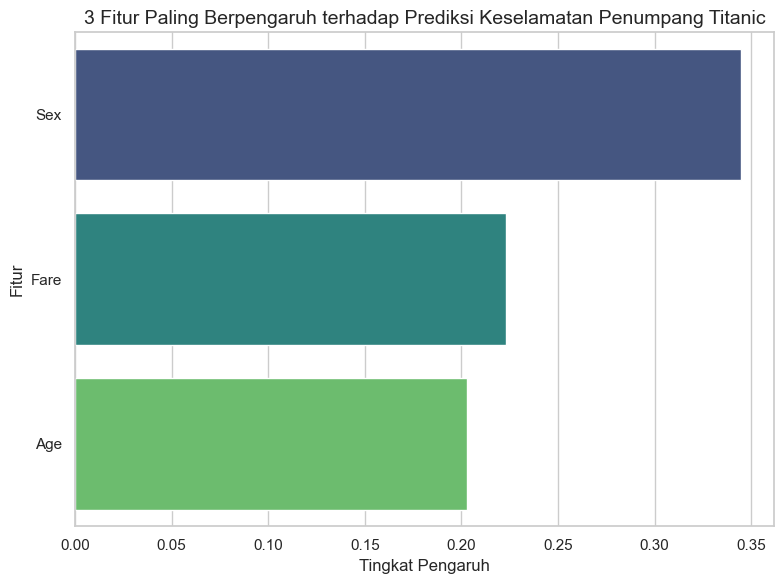

In [27]:
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Ambil feature importance dari model
importances = best_model.feature_importances_

# Buat DataFrame untuk visualisasi
importance_df = pd.DataFrame({'Fitur': feature_names, 'Pengaruh': importances})

# Urutkan berdasarkan pengaruh terbesar
importance_df = importance_df.sort_values('Pengaruh', ascending=False)

# Pilih 3 fitur paling berpengaruh
top_3_features = importance_df.head(3)

# Tampilkan hasil 3 fitur paling berpengaruh
print("\n3 Fitur Paling Berpengaruh terhadap Prediksi Keselamatan Penumpang Titanic:")
print(top_3_features)

# Visualisasi 3 fitur paling berpengaruh
plt.figure(figsize=(8, 6))
sns.barplot(data=top_3_features, x='Pengaruh', y='Fitur', palette='viridis')
plt.title('3 Fitur Paling Berpengaruh terhadap Prediksi Keselamatan Penumpang Titanic', fontsize=14)
plt.xlabel('Tingkat Pengaruh', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.tight_layout()
plt.show()


## Conclusion

### Conclusion Pertanyaan 1

Berdasarkan model yang telah dilatih, prediksi keselamatan penumpang Titanic untuk contoh data yang diberikan menunjukkan bahwa penumpang dengan Pclass 3, Sex female, Age 25, SibSp 0, Parch 0, Fare 7.25, dan Embarked S diprediksi Selamat. Model ini menggunakan data input yang telah diproses dan di-encode, kemudian diterapkan standarisasi sebelum melakukan prediksi menggunakan Random Forest Classifier, yang merupakan model terbaik berdasarkan evaluasi.



### Conclusion Pertanyaan 2

Berdasarkan feature importance dari model, tiga fitur yang paling berpengaruh dalam memprediksi keselamatan penumpang Titanic adalah:
- Sex (pengaruh 0.34)
- Fare (pengaruh 0.22)
- Age (pengaruh 0.20)
Fitur-fitur ini memiliki pengaruh signifikan terhadap prediksi keselamatan, dengan Sex sebagai fitur yang paling dominan.